In [1]:
%matplotlib inline

# imports 
import pandas as pd 
from pandas import DataFrame
import numpy as np

# decision tree imports 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Confusion Matrix
from sklearn.metrics import confusion_matrix

# cnf matrix plot imports
import matplotlib.pyplot as plt
import itertools

In [2]:
# read data from the Data_Visualization.csv 
df = pd.read_csv("data/Final_cleaned_up_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.HEAT_TYP.replace(['E','F','N','O','S','W'], ['NP','NP','NP','NP','NP','NP'], inplace=True)
df = pd.get_dummies(df, columns=['LU','OWN_OCC','AC'])
#structure class, r or u
df.head(20) 

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PID,ZIPCODE,AV_TOTAL,YR_BUILT,STRUCTURE_CLASS,LIVING_AREA,RorU,HEAT_TYP,Year,LU_A,...,LU_R2,LU_R3,LU_RC,OWN_OCC_N,OWN_OCC_Y,AC_C,AC_D,AC_E,AC_F,AC_N
0,2205668000_,2135,604700,1920,R,2834,R,NP,2014,0,...,0,1,0,1,0,0,0,0,0,1
1,2205664000_,2135,567000,1920,R,2952,R,NP,2014,0,...,1,0,0,0,1,0,0,0,0,1
2,2205663001_,2135,477600,1920,R,2390,R,NP,2014,0,...,0,0,0,0,1,0,0,0,0,1
3,2205663000_,2135,442700,1920,R,2347,R,NP,2014,0,...,0,0,0,0,1,0,0,0,0,1
4,2205662020_,2135,549000,1910,R,2545,R,NP,2014,0,...,1,0,0,0,1,0,0,0,0,1
5,2205662010_,2135,454200,1910,R,2218,R,NP,2014,0,...,0,0,0,1,0,0,0,0,0,1
6,2205660000_,2135,432200,1920,R,1612,R,NP,2014,0,...,0,0,0,0,1,0,0,0,0,1
7,2205659000_,2135,875200,1912,R,5770,R,NP,2014,0,...,1,0,0,1,0,0,0,0,0,1
8,2205658000_,2135,425200,1920,R,1562,R,NP,2014,0,...,0,0,0,0,1,0,0,0,0,1
9,2205657000_,2135,417500,1932,R,1707,R,NP,2014,0,...,0,0,0,0,1,0,0,0,0,1


In [3]:
X = df[['YR_BUILT', 'LIVING_AREA',
        'LU_A','LU_CD','LU_E','LU_EA','LU_R1','LU_R2','LU_R3','LU_RC',
        'OWN_OCC_N','OWN_OCC_Y',
        'AC_C','AC_D','AC_E','AC_F','AC_N']]
y = df[['HEAT_TYP']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
dtc = tree.DecisionTreeClassifier(class_weight='balanced')


dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

print('Decision tree accuracy on test data:', dtc.score(X_test, y_test))

# just for accuracy 
print('Decision tree accuracy on training data:', dtc.score(X_train, y_train))

Decision tree accuracy on test data: 0.999257116664
Decision tree accuracy on training data: 0.999379608482


In [5]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[63112,    42],
       [    5,   108]])

In [6]:
# Confusion Matrix Visualization
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[63112    42]
 [    5   108]]


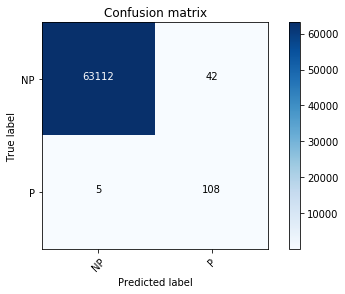

In [7]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NP','P'], 
                      title='Confusion matrix')
plt.show()

### Note:
This 2 class prediction is not bad when it classifies class P.